### Running grayscale images on Linear SVC 
### Running UMAP mapping on Linear SVC

In [1]:
# Load packages
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import time

## Linear SVC on Gray Data

**Load train data**

In [6]:
train_df = pd.read_csv('gray_small_train_set.csv')

#train_data = train_df.iloc[:, :train_df.shape[1]].values.astype(np.float32)
train_data = train_df.iloc[:, 1:].values.astype(np.float32)

train_target = train_df['label'].values

In [7]:
x_train = train_data
y_train =train_target

In [8]:
x_train.shape

(3377, 1200)

In [9]:
train_df.shape

(3377, 1201)

In [10]:
pd.DataFrame(train_data).head(2)

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,255.0,255.0,255.0,255.0,254.0,241.0,236.0,234.0,220.0,237.0,...,253.0,253.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


**Load validation data**

In [12]:
test_df = pd.read_csv('gray_small_test_set.csv')

test_data = test_df.iloc[:, 1:].values.astype(np.float32)

test_target = test_df['label'].values

In [13]:
x_test = test_data
y_test =  test_target

**Fit the data**

In [17]:
# Classification with a linear SVM
percent=100
start_time = time.time()
svc = LinearSVC(dual=False, random_state=123)
params_grid = {"C": [10 ** k for k in range(-3, 4)]}
clf = GridSearchCV(svc, params_grid)
clf.fit(x_train, y_train)
print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=False)



percent complete:  100 - 76.63652014732361 seconds -


**Validation data**

In [18]:
print("Accuracy on the test set with gray data: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on the test set with gray data: 0.981


**For later use**

In [20]:
import pickle

# Save to file
with open('linear_svc_gray_small.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [21]:
# Load from file
with open('linear_svc_gray_small.pkl', 'rb') as f:
    clf_graw_loaded = pickle.load(f)

### Check accuracy per category 
Use validation set

In [23]:
decipher_key = {
    0:"Pants",
    1:"Tshirts",
    2:"Watches",
    3:"Casual Shoes"
 
}

In [24]:
x_tlist =[]
y_tlist = []
tlabel =[]
for i in range(4):
    indices = np.where(y_test == i)[0]
    y_tlist.append(y_test[indices])
    x_tlist.append(x_test[indices])
    tlabel.append(decipher_key[i])
    
y_tlist[0].shape, y_tlist[0][0:3]
    

((239,), array([0, 0, 0], dtype=int64))

In [25]:
for i in range(4):
    print("Accuracy on the",tlabel[i]," test set with grayscale image: {:.3f}".\
          format(clf_graw_loaded.score(x_tlist[i], y_tlist[i])))

Accuracy on the Pants  test set with grayscale image: 0.987
Accuracy on the Tshirts  test set with grayscale image: 0.969
Accuracy on the Watches  test set with grayscale image: 0.988
Accuracy on the Casual Shoes  test set with grayscale image: 0.980


**The above are the results on the validation set**

**When compared to the RAW RGB fitting, it scored considerably lower on Tshirts, but higher score on Watches. However the peformance on the fitting is about 2x faster.

**Generate Confusion Matrix For Each Result**

In [26]:
from sklearn.metrics import confusion_matrix
#x_tlist[i]
#y_tlist[i]

# Use the fitted model to make predictions on the same data used for fitting
y_pred = clf_graw_loaded.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#print(cm)


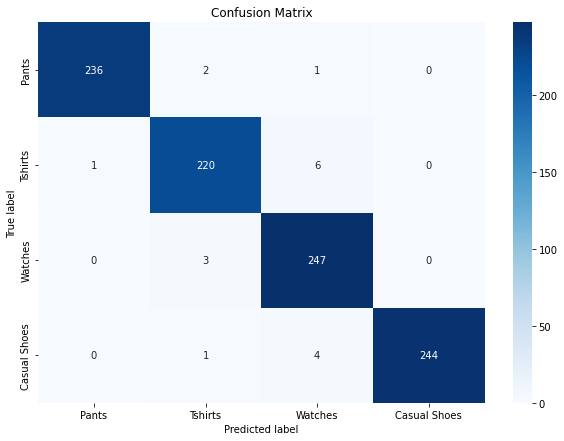

In [27]:
# Create a heatmap
# Create a list of labels
labels = [decipher_key[i] for i in range(4)]
plt.figure(figsize=(10,7))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**Pull Up Examples of False Positives (Tshirts)**

In [28]:
# Assuming y_true is your list of true labels and y_pred is your list of predicted labels
# And X_data is your original dataset

misclassified_indexes = []

for i in range(len(y_test)):
    # If true label is 'Tshirts' (which corresponds to 1)
    # and predicted label is 'Casual Shoes' (which corresponds to 3)
    if (y_test[i] == 1) and (y_pred[i] == 2):
        misclassified_indexes.append(i)

# Now, misclassified_indexes contains the indexes of all misclassified examples
# You can use it to get the corresponding data from X_data
#misclassified_data = x_test[misclassified_indexes]

In [29]:
misclassified_indexes

[225, 286, 398, 652, 851, 910]

In [30]:
test_df = pd.read_csv('output_rgb_test.csv')

#test_img = test_df.iloc[:, 1:].values.astype(np.float32)
test_img = test_df.iloc[:, 1:].values.astype(np.uint8)

test_label = test_df['label'].values

#img_rgb = (img_rgb * 255).astype(np.uint8) before axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

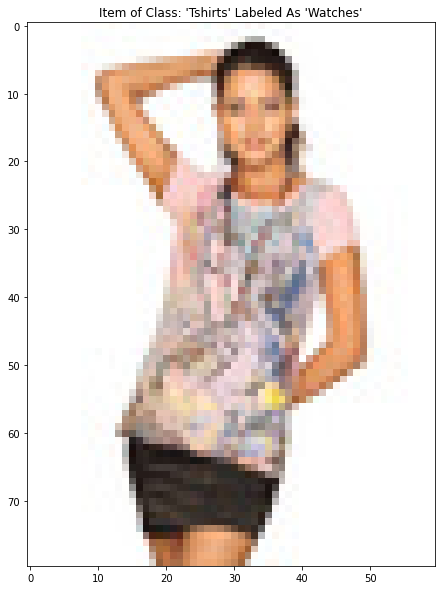

In [31]:
temp =misclassified_indexes[0]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

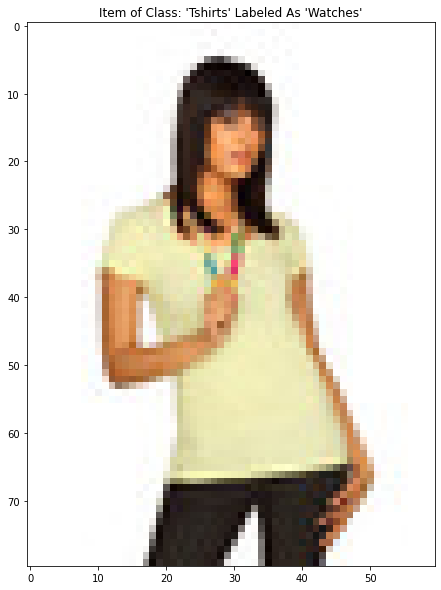

In [32]:
temp =misclassified_indexes[1]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

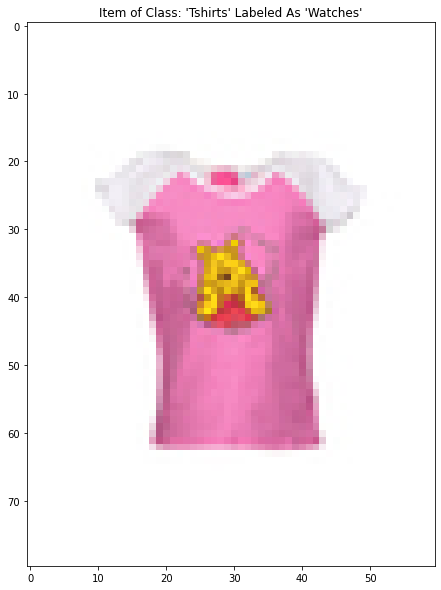

In [33]:
temp =misclassified_indexes[2]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

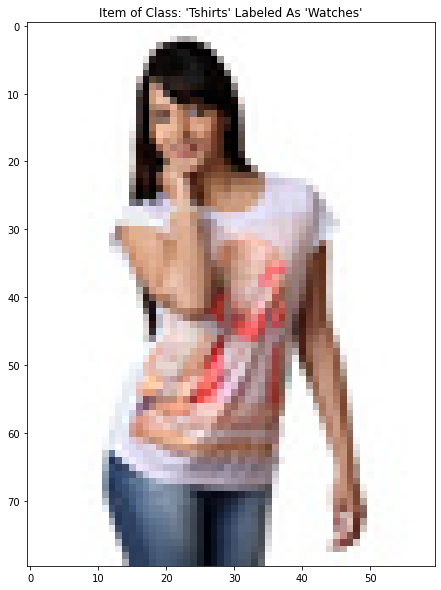

In [34]:
temp =misclassified_indexes[3]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

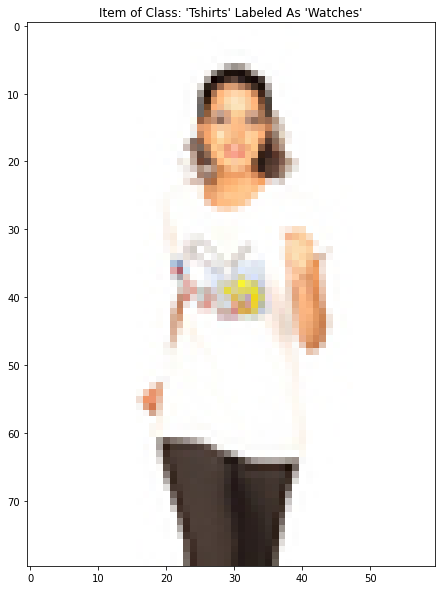

In [35]:
temp =misclassified_indexes[4]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

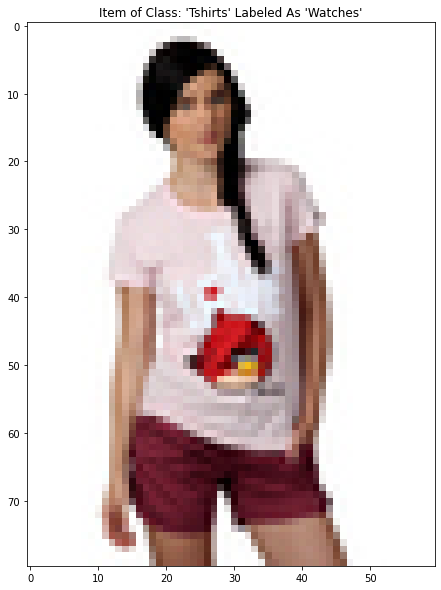

In [37]:
temp =misclassified_indexes[5]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

**Pull Up Examples of False Positives (Watches as Tshirts)**

In [38]:
# Assuming y_true is your list of true labels and y_pred is your list of predicted labels
# And X_data is your original dataset

misclassified_indexes = []

for i in range(len(y_test)):
    # If true label is 'Tshirts' (which corresponds to 1)
    # and predicted label is 'Casual Shoes' (which corresponds to 3)
    if (y_test[i] == 2) and (y_pred[i] == 1):
        misclassified_indexes.append(i)

# Now, misclassified_indexes contains the indexes of all misclassified examples
# You can use it to get the corresponding data from X_data
#misclassified_data = x_test[misclassified_indexes]

<Figure size 2016x2016 with 0 Axes>

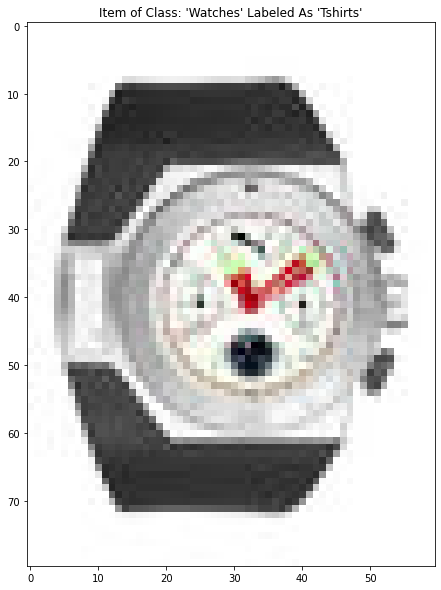

In [39]:
temp =misclassified_indexes[0]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

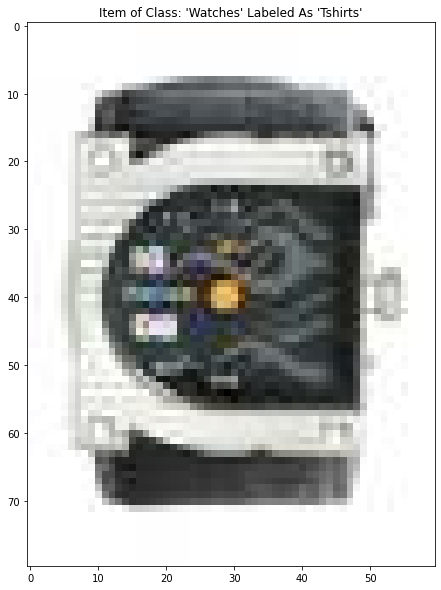

In [40]:
temp =misclassified_indexes[1]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

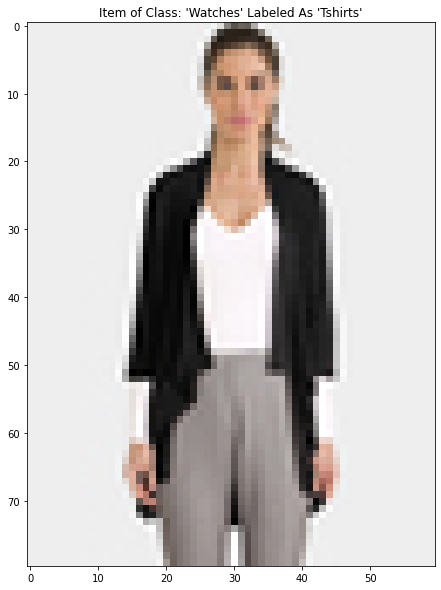

In [41]:
temp =misclassified_indexes[2]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

**The above example shows that in the training data some of our Tshirt images are labeled as Watches.**

## Linear SVC on UMAP Data

**Here we want to train a LinearSVC on the reduced dimensionality created by UMAP**

**Load previously mapped train data**

In [16]:
train_umap = pd.read_csv('umap_train_gray_small.csv')

In [17]:
train_umap.head(2)

,label,embedding x,embedding y
0,1.0,2.110022,-7.999280
1,0.0,5.100040,8.833552


In [18]:
#train_df.iloc[:, 1:].values.astype(np.float32)
x_train_u = train_umap.iloc[:, 1:].values.astype(np.float32)
y_train_u =train_umap['label'].values


In [19]:
x_train_u.shape, y_train_u.shape

((3377, 2), (3377,))

**map validation data**

In [20]:
# Load new data
test_data = pd.read_csv('gray_small_test_set.csv')
test_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,0,255,255,255,255,254,250,217,214,201,...,255,255,255,255,255,255,255,255,255,255
1,1,255,255,255,255,255,255,255,255,254,...,248,253,253,253,255,255,255,255,255,255
2,0,255,255,255,255,253,253,202,201,202,...,254,254,255,254,255,255,255,255,255,255
3,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,1,255,255,255,255,255,255,255,255,252,...,250,250,252,254,255,255,255,255,255,255


In [21]:
test_data.shape

(965, 1201)

**We load previously fitted umap model, and use the model to reduce the dimensions of the validation data**

In [25]:
percent=100
start_time = time.time()
import joblib
# Load the saved model
umap_model = joblib.load('umap_model_gray_small.pkl')

# Transform new data
#slicing is to remove label in column 0
embedding = umap_model.transform(test_data.iloc[:,1:])
print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=False)



percent complete:  100 - 0.7633359432220459 seconds -


In [27]:
type(embedding)

numpy.ndarray

In [28]:
embedding.shape

(965, 2)

In [29]:
embedding

array([[ 5.991951  ,  7.273434  ],
       [ 2.488757  , -6.9220467 ],
       [ 4.471729  ,  6.0815744 ],
       ...,
       [-8.203518  ,  2.9320054 ],
       [ 2.5410123 , -0.03980897],
       [ 5.10683   ,  7.669269  ]], dtype=float32)

In [52]:
test_data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,240,226,...,255,255,255,255,255,255,255,255,255,255


**we export the mapped validation data for later use**

In [54]:
#
target = test_data['label']
target = target[:, np.newaxis]

# Concatenate along the second axis
emb_target = np.concatenate((target, embedding), axis=1)

column_names = ['label','embedding x', 'embedding y']
embedding_df = pd.DataFrame( emb_target, columns=column_names)
#embedding_df.head()

embedding_df.to_csv('umap_test_gray_small.csv', index=False, header=True)  

C:\Users\edgomr\AppData\Local\Temp\ipykernel_6572\3492519139.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  target = target[:, np.newaxis]


**We load our train data to use in building our classifier**

In [30]:
test_umap = pd.read_csv('umap_test_gray_small.csv')

In [31]:
test_umap.head(2)

,label,embedding x,embedding y
0,3.0,-8.880007,3.241354
1,0.0,4.368115,5.876838


In [32]:
x_test_u = test_umap.iloc[:, 1:].values.astype(np.float32)
y_test_u =test_umap['label'].values

In [33]:
x_test_u.shape, y_test_u.shape

((965, 2), (965,))

**Linear SVC on UMAP Data immediate output**

In [34]:
# Classification with a linear SVM
percent=100
start_time = time.time()
svc = LinearSVC(dual=False, random_state=123)
params_grid = {"C": [10 ** k for k in range(-3, 4)]}
clf_umap = GridSearchCV(svc, params_grid)
clf_umap.fit(x_train_u, y_train_u)
print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=True)

percent complete:  100 - 0.2788238525390625 seconds -


**Validation data**

In [35]:
percent=100
start_time = time.time()
print("Accuracy on the test set with gray data: {:.3f}".format(clf_umap.score(x_test_u, y_test_u)))
print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=True)

Accuracy on the test set with gray data: 0.930
percent complete:  100 - 0.002000093460083008 seconds -


**We save our fitted LinearSVC model using reduced dimensional output from UMAP**

In [66]:
import pickle

# Save to file
with open('umap_gray_small.pkl', 'wb') as f:
    pickle.dump(clf_umap, f)


**We reload our fitted LinearSVC**

In [67]:
# Load from file
with open('umap_gray_small.pkl', 'rb') as f:
    clf_gumap_loaded = pickle.load(f)

**We check accuracy for each label**

In [68]:
#define list, x data test list from umap
x_tlistu =[]
y_tlistu = []
tlabelu =[]
for i in range(4):
    indices = np.where(y_test_u == i)[0]
    y_tlistu.append(y_test_u[indices])
    x_tlistu.append(x_test_u[indices])
    tlabelu.append(decipher_key[i])
    
y_tlistu[0].shape, y_tlistu[0][0:3]

((231,), array([0., 0., 0.]))

In [69]:
percent=100
start_time = time.time()
for i in range(4):
    print("Accuracy on the",tlabelu[i]," test set with grayscale image: {:.3f}".\
          format(clf_gumap_loaded.score(x_tlistu[i], y_tlistu[i])))
print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=True)

Accuracy on the Pants  test set with grayscale image: 0.926
Accuracy on the Tshirts  test set with grayscale image: 0.796
Accuracy on the Watches  test set with grayscale image: 0.993
Accuracy on the Casual Shoes  test set with grayscale image: 0.973


**The above results are for the validation data**

In [70]:
from sklearn.metrics import confusion_matrix
#x_tlist[i]
#y_tlist[i]

# Use the fitted model to make predictions on the same data used for fitting
y_pred_u = clf_gumap_loaded.predict(x_test_u)

# Generate the confusion matrix
cm = confusion_matrix(y_test_u, y_pred_u)

print(cm)

[[214   1  16   0]
 [  0 164  20  22]
 [  0   0 265   2]
 [  0   1   6 254]]


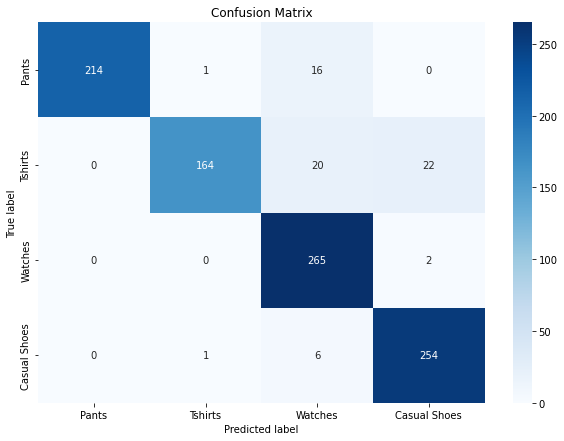

In [71]:

# Create a heatmap
# Create a list of labels
labels = [decipher_key[i] for i in range(4)]
plt.figure(figsize=(10,7))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**pull examples**

In [72]:
# Assuming y_true is your list of true labels and y_pred is your list of predicted labels
# And X_data is your original dataset

misclassified_indexes = []

for i in range(len(y_test_u)):
    # If true label is 'Tshirts' (which corresponds to 1)
    # and predicted label is 'Casual Shoes' (which corresponds to 3)
    if (y_test_u[i] == 1) and (y_pred_u[i] == 3):
        misclassified_indexes.append(i)

# Now, misclassified_indexes contains the indexes of all misclassified examples
# You can use it to get the corresponding data from X_data
#misclassified_data = x_test[misclassified_indexes]




In [73]:
misclassified_indexes

[91,
 187,
 210,
 221,
 239,
 290,
 309,
 419,
 423,
 440,
 481,
 512,
 516,
 616,
 633,
 638,
 646,
 673,
 688,
 817,
 933,
 964]

**Since the accuracy decreased to 93%, maybe a different classifier would performe better**